In [10]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
import copy
import glob

In [11]:
micapipe_dir = '../sourcedata/Micapipe_PNI'
hippunfold_dir = '../hippunfold/PNI_v1.3.0/hippunfold'

subs = ['PNC003', 'PNC006', 'PNC007', 'PNC009', 'PNC010', 'PNC015', 'PNC018', 'PNC019', 'PNC020', 'PNC021']
ses = '01'
hemis = ['L','R']
labels = ['hipp','dentate'] 

ind = [range(7262), range(7262,7262+1788)]

In [12]:
features = ['model-DTI_map-FA', 'model-DTI_map-ADC']
for feature in features:
    for sub in subs:
        for hemi in hemis:
            for label in labels:
                cmd = f'wb_command -volume-to-surface-mapping '\
                    f'{micapipe_dir}/sub-{sub}/ses-{ses}/maps/sub-{sub}_ses-{ses}_space-nativepro_{feature}.nii.gz '\
                    f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_midthickness.surf.gii '\
                    f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_{feature}.shape.gii '\
                    f'-trilinear'
                if not glob.glob(f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_{feature}.shape.gii'):
                    !{cmd}


While running:
wb_command -volume-to-surface-mapping ../sourcedata/Micapipe_PNI/sub-PNC010/ses-01/maps/sub-PNC010_ses-01_space-nativepro_model-DTI_map-FA.nii.gz ../hippunfold/PNI_v1.3.0/hippunfold/sub-PNC010/ses-01/surf/sub-PNC010_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_midthickness.surf.gii ../hippunfold/PNI_v1.3.0/hippunfold/sub-PNC010/ses-01/surf/sub-PNC010_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_model-DTI_map-FA.shape.gii -trilinear

ERROR: NAME OF FILE: sub-PNC010_ses-01_space-nativepro_model-DTI_map-FA.nii.gz
PATH TO FILE: ../sourcedata/Micapipe_PNI/sub-PNC010/ses-01/maps

File does not exist.


While running:
wb_command -volume-to-surface-mapping ../sourcedata/Micapipe_PNI/sub-PNC010/ses-01/maps/sub-PNC010_ses-01_space-nativepro_model-DTI_map-FA.nii.gz ../hippunfold/PNI_v1.3.0/hippunfold/sub-PNC010/ses-01/surf/sub-PNC010_ses-01_hemi-L_space-T1w_den-0p5mm_label-dentate_midthickness.surf.gii ../hippunfold/PNI_v1.3.0/hippunfold/sub-PNC010/ses-01/surf/sub-PNC010_ses-01_he

In [13]:
for sub in subs:
    for hemi in hemis:
        for label in labels:
            cmd = f'wb_command -volume-to-surface-mapping '\
                f'{micapipe_dir}/../../rawdata/sub-{sub}/ses-{ses}/anat/sub-{sub}_ses-{ses}_acq-T1_T1map.nii.gz '\
                f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_midthickness.surf.gii '\
                f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_qT1.shape.gii '\
                f'-trilinear'
            if not glob.glob(f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_qT1.shape.gii'):
                !{cmd}

In [14]:
features = ['thickness', 'gyrification', 'curvature', 'model-DTI_map-FA', 'model-DTI_map-ADC', 'qT1']
hipp_dat = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan

for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/ses-{ses}/surf/'\
                                 f'sub-{sub}_ses-{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii')
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    hipp_dat[ind[l],h,s,f] = np.nan

In [15]:
# flip L curvatures
hipp_dat[:,0,:,2] = -hipp_dat[:,0,:,2]

/data/mica1/01_programs/hippunfold/ipykernel_33724/341615489.py:1: RuntimeWarning: Mean of empty slice
  cdata = np.nanmean(hipp_dat,axis=2)
/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


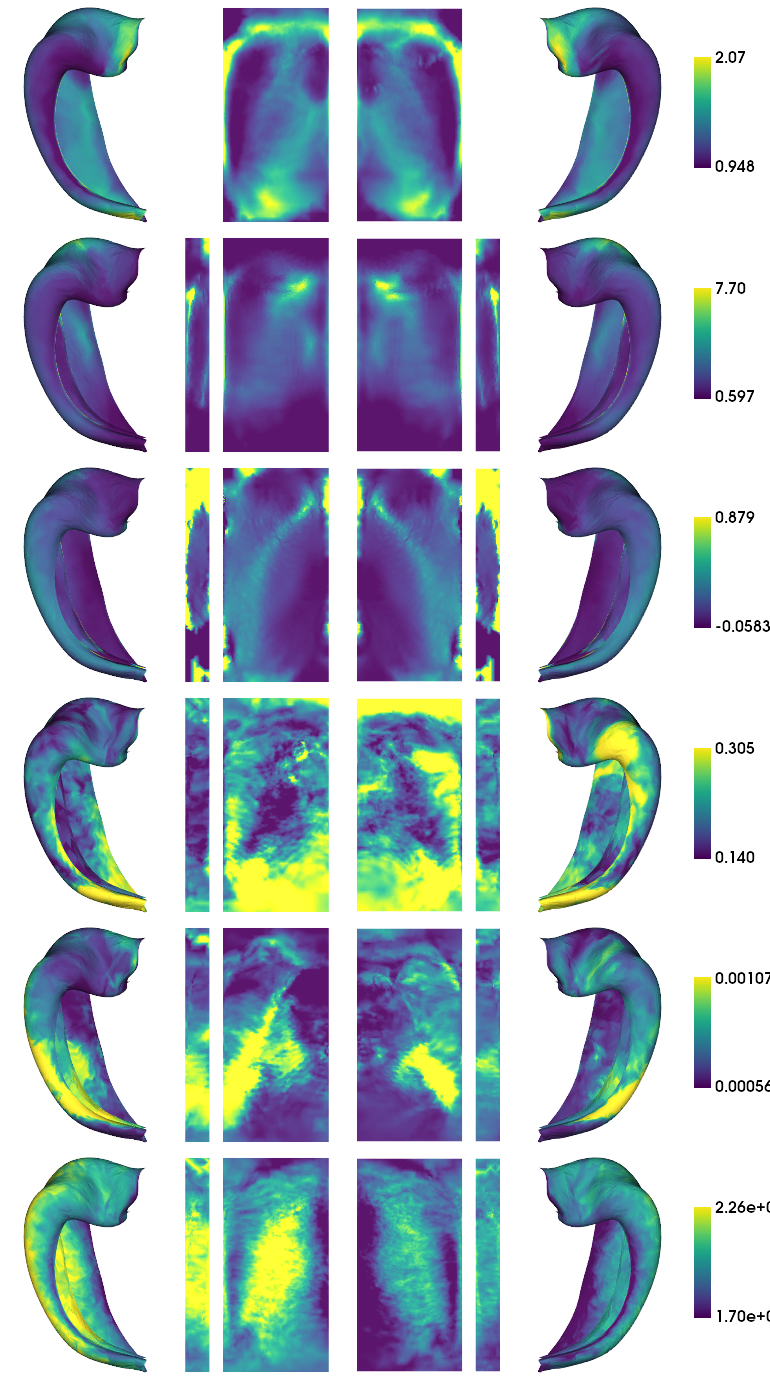

In [16]:
cdata = np.nanmean(hipp_dat,axis=2)
plotting.surfplot_canonical_foldunfold(cdata[:,:,:], color_bar=('right'), share='row', tighten_cwindow=True, embed_nb=True)